### K-means Clustering

In [3]:
import pandas as pd
# < write code here >
#from sklearn import
from sklearn.cluster import KMeans

data = pd.read_csv('datasets/segments.csv')

# Model training
model = KMeans(n_clusters=3, random_state=12345)# < write code here >
model.fit(data)# < write code here >

print("Cluster centroids:")
print(model.cluster_centers_)# < write code here >)

Cluster centroids:
[[10.68632155 98.90275017 10.856     ]
 [40.14472236 15.00741697  8.56      ]
 [10.90357994 29.90244865 15.096     ]]


The result is a list of centroids from three vectors.
- the first coordinate of these vectors  contains the average session time
- the second coordinate is the average check, and its different for the centroids with doifferent session times.
- the third coordinate is the time passed since  iser registration.

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

data = pd.read_csv('datasets/segments.csv')
centers = np.array([[20, 80, 8], [50, 20, 5], [20, 30, 10]])

model = KMeans(n_clusters=3, random_state=12345)
model.fit(data)

print("Cluster centroids:")
print(model.cluster_centers_)

# Training a model with initial centroids
model = KMeans(n_clusters=3, init=centers, random_state=12345)# < write code here >
model.fit(data)# < write code here >

print("Cluster centroids of the model with initial centroids:")
print(model.cluster_centers_)# < write code here >)

Cluster centroids:
[[10.68632155 98.90275017 10.856     ]
 [40.14472236 15.00741697  8.56      ]
 [10.90357994 29.90244865 15.096     ]]
Cluster centroids of the model with initial centroids:
[[10.68632155 98.90275017 10.856     ]
 [50.06201472 19.62701512  1.808     ]
 [20.56550497 20.14513373 15.204     ]]


- One centroid remained the same while other two distanced themselves.

### Objective Function

In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

data = pd.read_csv('datasets/segments.csv')
centers = np.array([[20, 80, 8], [50, 20, 5], [20, 30, 10]])

model = KMeans(n_clusters=3, random_state=12345)
model.fit(data)

print("Objective function:")
print(model.inertia_)

model = KMeans(n_clusters=3, init=centers, random_state=12345)
model.fit(data)

print("The objective function of the model with initial centroids:")
print(model.inertia_)
print('The sum of squared distances of samples to their closest cluster center.')

Objective function:
68431.50999400367
The objective function of the model with initial centroids:
74253.20363562096
The sum of squared distances of samples to their closest cluster center.


In [11]:
centers.shape

(3, 3)

- the objective loss function with initial centroids is bigger when the algorithm is launched only once. With a 10-fold launch, there's a higher chance of finding more suitable initial centroids.

### Data Visualization

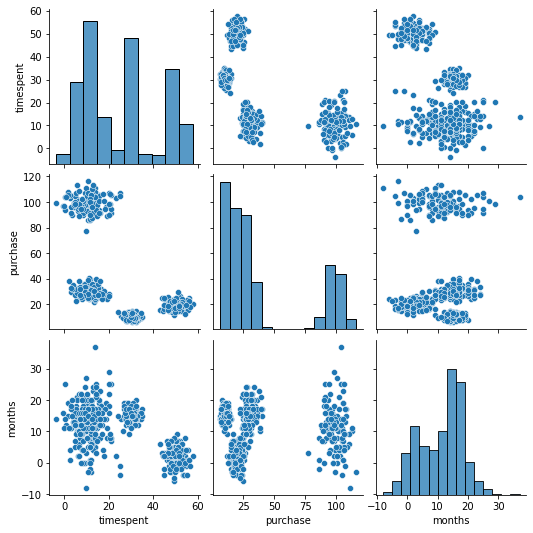

In [13]:
import seaborn as sns
sns.pairplot(data, diag_kind='hist')

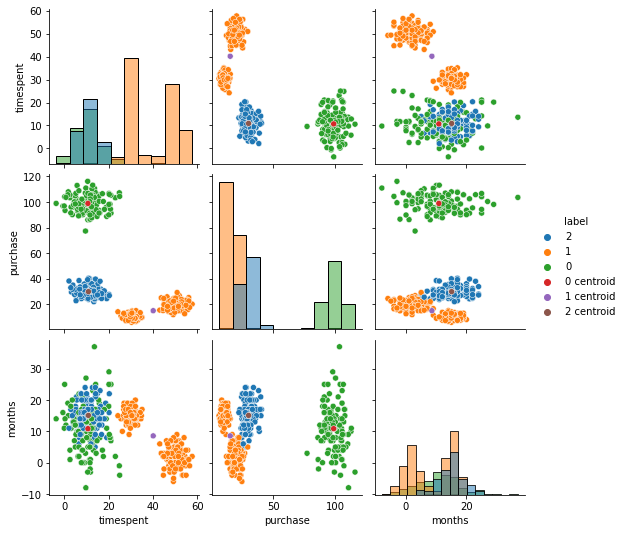

In [15]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

data = pd.read_csv('datasets/segments.csv')

model = KMeans(n_clusters=3, random_state=12345)
model.fit(data)

centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)
# Add a column with the cluster number
data['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid', '2 centroid']
# An index reset will be needed later
data_all = pd.concat([data, centroids], ignore_index=True)

# Plot the graph
sns.pairplot(data_all, hue='label', diag_kind='hist')

In [21]:
data.head()

,timespent,purchase,months,label
0,9.749627,26.984142,14.0,2
1,30.416766,5.916530,15.0,1
2,8.809746,35.502827,14.0,2
3,31.418008,9.820529,18.0,1
4,48.279014,18.359423,2.0,1


In [25]:
data.shape, data_all.shape

((500, 4), (503, 4))

In [23]:
data_all

,timespent,purchase,months,label
0,9.749627,26.984142,14.000,2
1,30.416766,5.916530,15.000,1
2,8.809746,35.502827,14.000,2
3,31.418008,9.820529,18.000,1
4,48.279014,18.359423,2.000,1
...,...,...,...,...
498,56.226202,22.613374,1.000,1
499,54.934903,19.252892,4.000,1
500,10.686322,98.902750,10.856,0 centroid
501,40.144722,15.007417,8.560,1 centroid


In [20]:
centroids

,timespent,purchase,months,label
0,10.686322,98.902750,10.856,0 centroid
1,40.144722,15.007417,8.560,1 centroid
2,10.903580,29.902449,15.096,2 centroid


In [18]:
model.cluster_centers_?

In [19]:
data.columns

Index(['timespent', 'purchase', 'months', 'label'], dtype='object')

In [22]:
pd.concat?

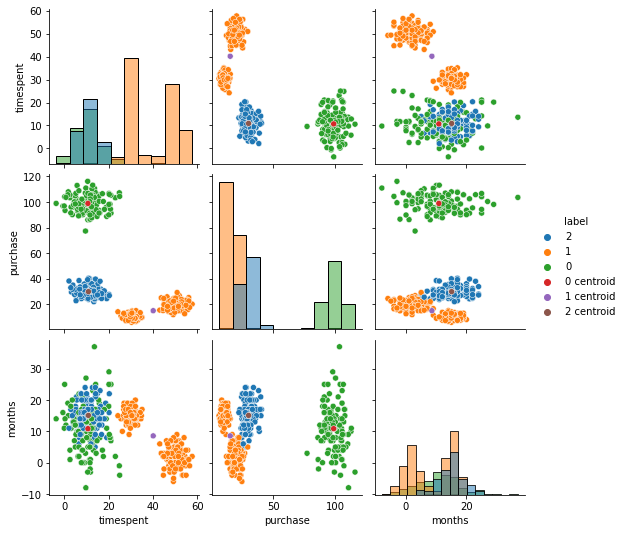

In [34]:
pairgrid = sns.pairplot(data_all, hue='label', diag_kind='hist')

In [27]:
pairgrid

In [36]:
pairgrid.data = pd.DataFrame([[20, 80, 8], [50, 20, 5], [20, 30, 10]],
                             columns=data.drop(columns=['label']).columns)

In [32]:
pairgrid.map_offdiag?

KeyError: "['label'] not in index"

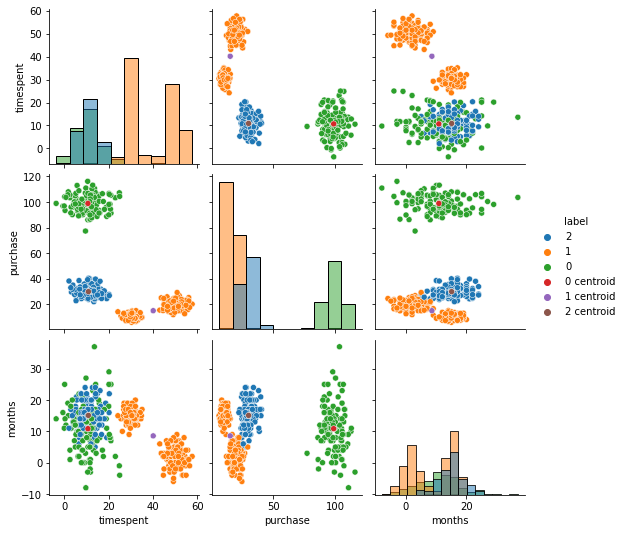

In [37]:
pairgrid.map_offdiag(func=sns.scatterplot, s=200, marker='*', color='red', label=data['label'])

In [38]:
KMeans?

KeyError: "['label'] not in index"

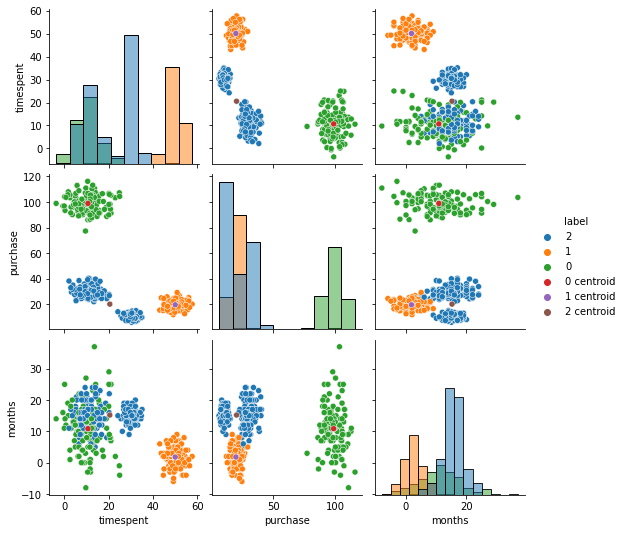

In [40]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

data = pd.read_csv('datasets/segments.csv')
centers = np.array([[20, 80, 8], [50, 20, 5], [20, 30, 10]])

model = KMeans(n_clusters=3, init=centers, random_state=12345)
model.fit(data)
centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)

centroids_init = pd.DataFrame(centers, columns=data.columns)

data['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid', '2 centroid']
# An index reset is required to create pairgrid.data
data_all = pd.concat([data, centroids], ignore_index=True)

pairgrid = sns.pairplot(data_all, hue='label', diag_kind='hist')
# An additional layer for the centroids
pairgrid.data = centroids_init
# < write code here >
pairgrid.map_offdiag(func=sns.scatterplot, s=200, marker='*', color='red')

### Optimal Number of Clusters

In [41]:
distortion = []
K = range(1, 8)
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(data)
    distortion.append(model.inertia_)

In [42]:
distortion

[782566.1854730697,
 161816.98286935443,
 68494.00999400367,
 27110.790247969922,
 22468.766585439167,
 19960.565605742842,
 18311.94347665329]

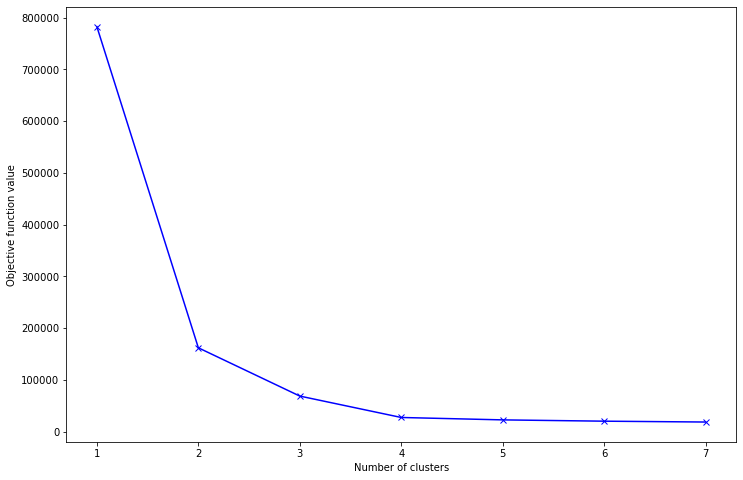

In [43]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

plt.figure(figsize=(12, 8))
plt.plot(K, distortion, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Objective function value')
plt.show()

- This is a graph plotted using the elbow method: 
    - the value of the objective function decreases sharply at first, and then eases into a plateau. 
        - This moment of transition signifies the optimal number of clusters.
- In this graph, the plateau starts after the fourth cluster, although the the second and third clusters are acceptable as well. 
    - After these, the decline of the objective function is not significant.

In [45]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

data = pd.read_csv('datasets/segments.csv')

K = range(1, 8)
for k in K:
		# < write code here >
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(data)
    print('Number of clusters:', k) 
    print('Objective function value', model.inertia_)

Number of clusters: 1
Objective function value 782222.4354730697
Number of clusters: 2
Objective function value 161733.6495360213
Number of clusters: 3
Objective function value 68431.50999400367
Number of clusters: 4
Objective function value 27110.790247969922
Number of clusters: 5
Objective function value 22468.766585439167
Number of clusters: 6
Objective function value 19962.55163810146
Number of clusters: 7
Objective function value 18311.94347665329


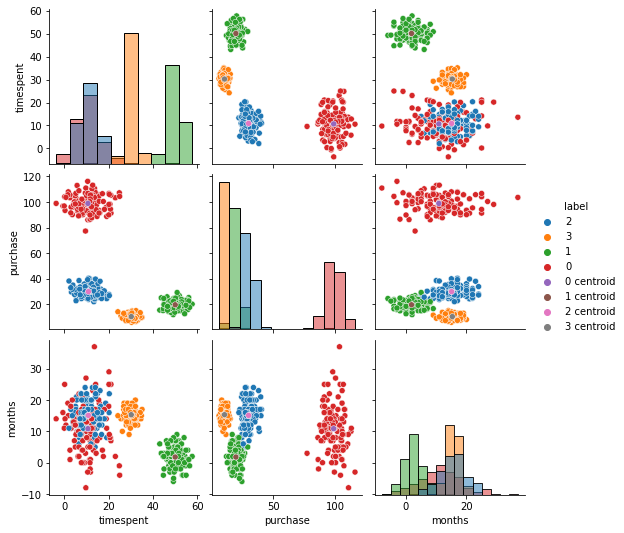

In [46]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

data = pd.read_csv('datasets/segments.csv')

# Training a model for 4 clusters
model = KMeans(n_clusters=4, random_state=12345)
model.fit(data)

centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)
data['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid', '2 centroid', '3 centroid']
data_all = pd.concat([data, centroids], ignore_index=True)

# Plot the graph
sns.pairplot(data_all, hue='label', diag_kind='hist')

In [48]:
import pandas as pd
from sklearn.cluster import KMeans

data = pd.read_csv('datasets/segments.csv')

# Training a model for 3 clusters
# < write code here >
model = KMeans(n_clusters=3, random_state=12345)
model.fit(data)

print("Typical user segments for 3 clusters:")
print(model.cluster_centers_.round())

# Training a model for 4 clusters
model = KMeans(n_clusters=4, random_state=12345)
model.fit(data)

print("Typical user segments for 4 clusters:")
print(model.cluster_centers_.round())

Typical user segments for 3 clusters:
[[11. 99. 11.]
 [40. 15.  9.]
 [11. 30. 15.]]
Typical user segments for 4 clusters:
[[11. 99. 11.]
 [50. 20.  2.]
 [11. 30. 15.]
 [30. 10. 15.]]


### Structuring Data

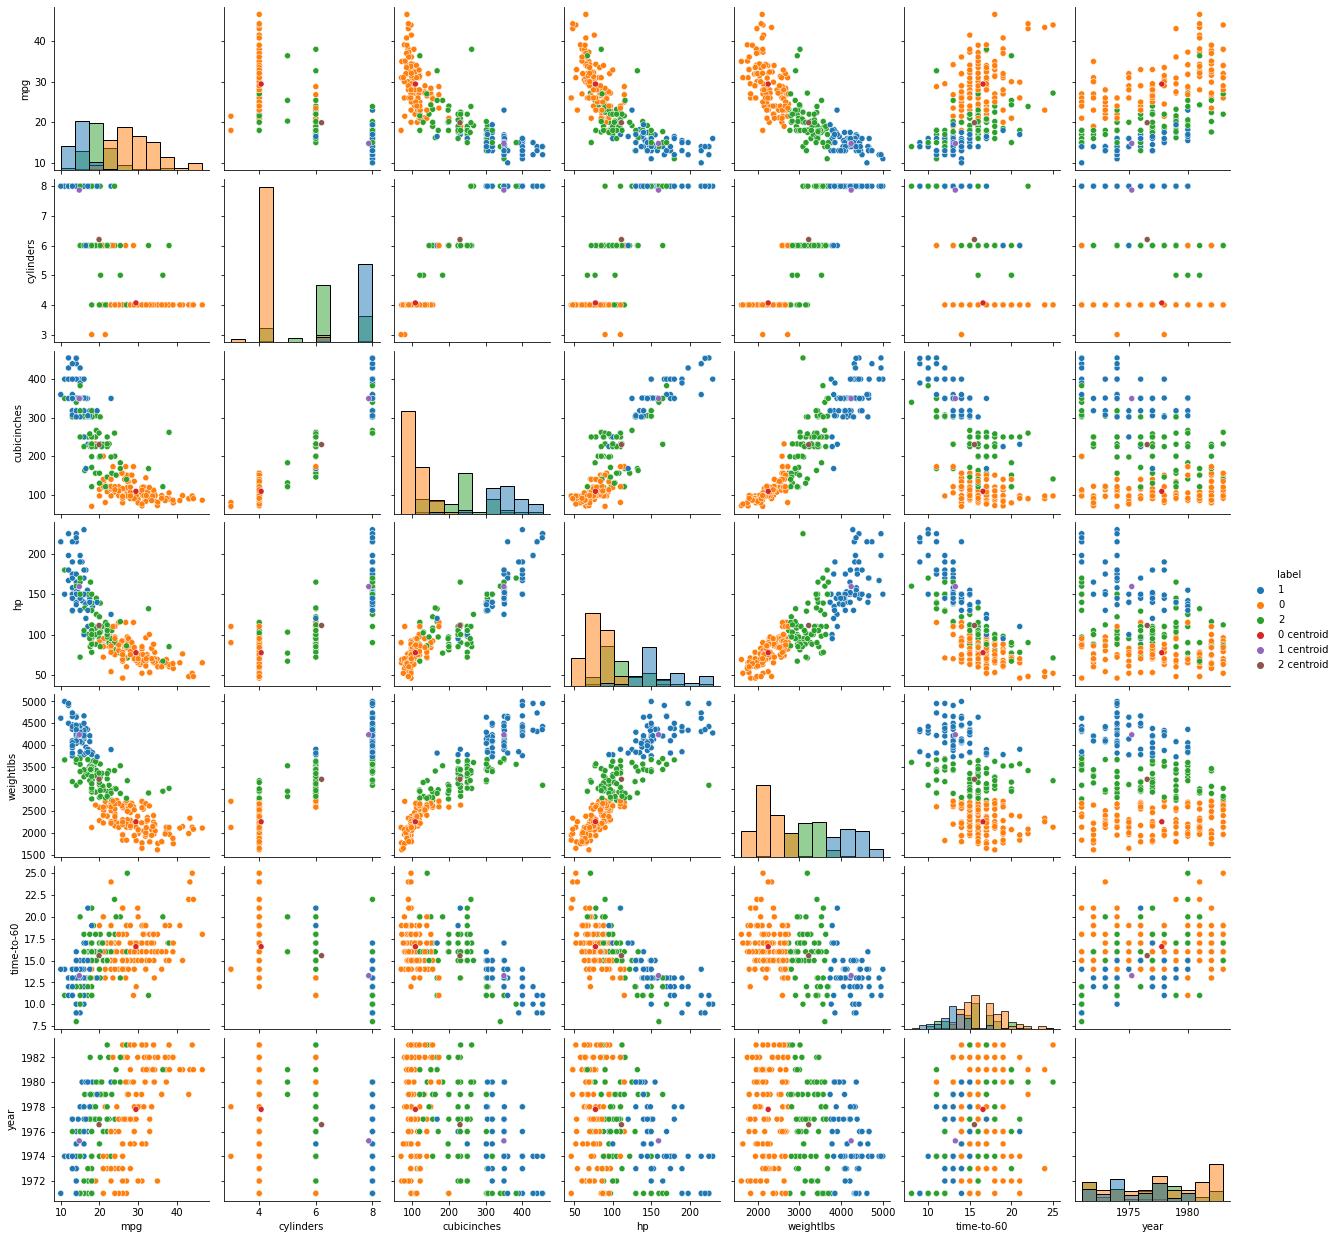

In [50]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

data = pd.read_csv('datasets/cars.csv')

# < write code here >
model = KMeans(n_clusters=3, random_state=12345)
model.fit(data)

centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)
# Add a column with the cluster number
data['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid', '2 centroid']
# An index reset will be needed later
data_all = pd.concat([data, centroids], ignore_index=True)

# Plot the graph
sns.pairplot(data_all, hue='label', diag_kind='hist', vars=data.columns[:-1])

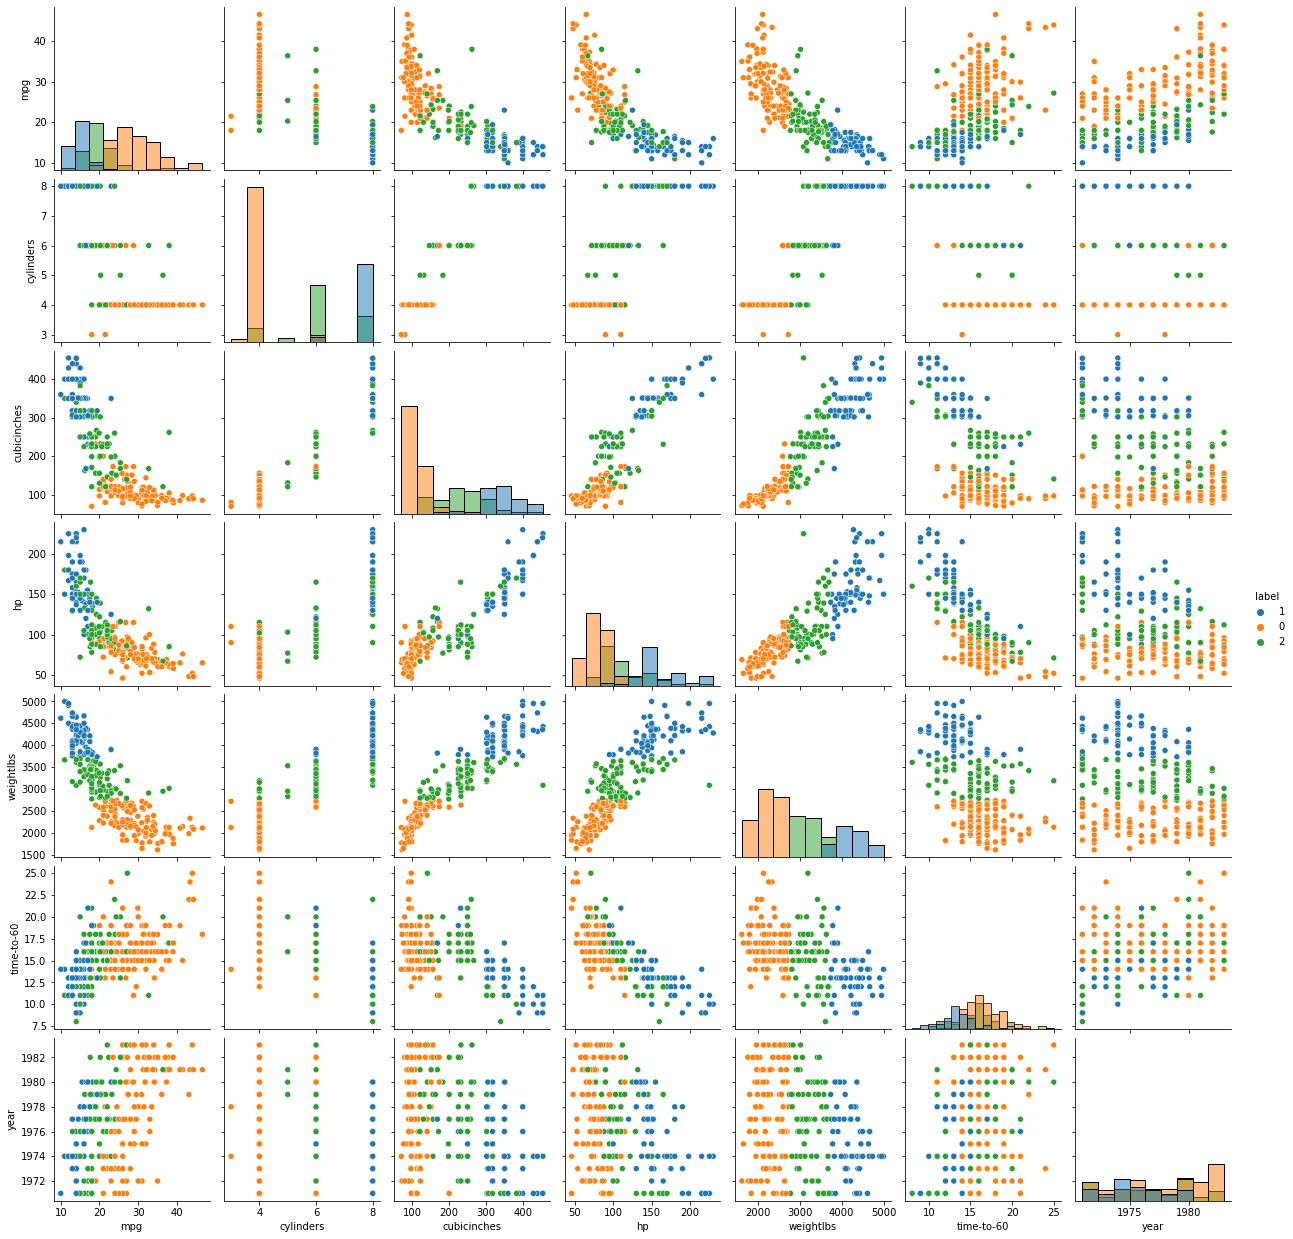

In [51]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

data = pd.read_csv('datasets/cars.csv')

# < write code here >
model = KMeans(n_clusters=3, random_state=12345)
model.fit(data)

#centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)
# Add a column with the cluster number
data['label'] = model.labels_.astype(str)
#centroids['label'] = ['0 centroid', '1 centroid', '2 centroid']
# An index reset will be needed later
#data_all = pd.concat([data, centroids], ignore_index=True)

# Plot the graph
sns.pairplot(data, hue='label', diag_kind='hist', vars=data.columns[:-1])

In [4]:
pairgrid.map_offdiag?

KeyError: "['brand'] not in index"

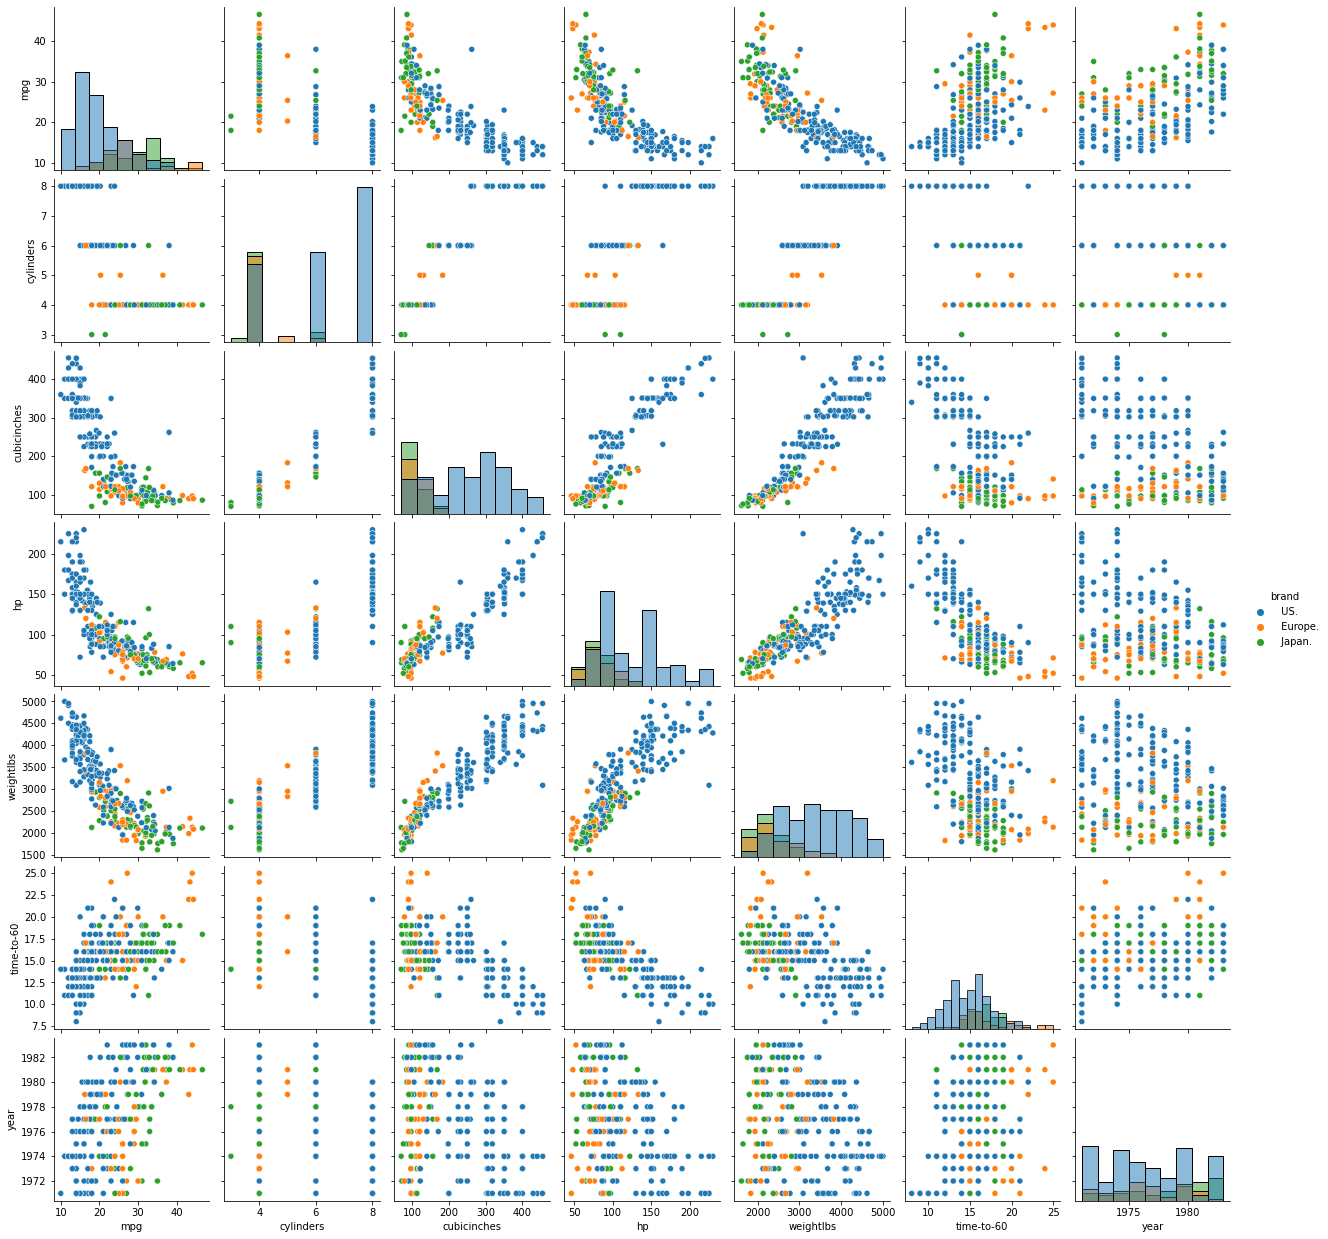

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
 
data_full = pd.read_csv('datasets/cars_label.csv')
 
data = data_full.drop(columns=['brand'])
model = KMeans(n_clusters=3, random_state=12345)
model.fit(data)
centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)
 
pairgrid = sns.pairplot(data_full, hue='brand', diag_kind='hist')
pairgrid.data = centroids
pairgrid.map_offdiag(func=sns.scatterplot, s=200, marker='*', color='red', label='')

## Anomaly Detection

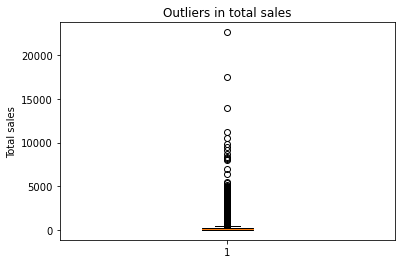

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('datasets/sales.csv')

plt.boxplot(df['Sales'].values)
plt.ylabel('Total sales')
plt.title("Outliers in total sales")
plt.show()

Outliers in total sales:  1167


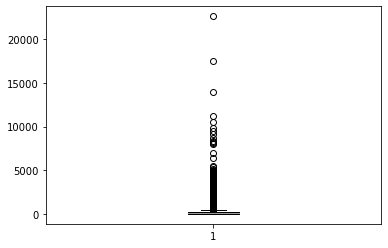

In [9]:
boxplot = plt.boxplot(df['Sales'].values)
outliers = list(boxplot["fliers"][0].get_data()[1])
print("Outliers in total sales: ", len(outliers))

In [12]:
len(outliers)/df.shape[0] * 100

11.677006203722232

Number of anomalies:  1881


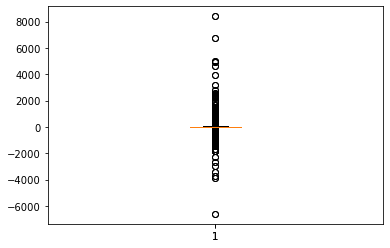

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/sales.csv')

# < write code here >
plt.boxplot(df['Profit'].values)
boxplot = plt.boxplot(df['Profit'].values)
outliers = list(boxplot["fliers"][0].get_data()[1])

df_outliers = df[df['Profit'].isin(outliers)]

print("Number of anomalies: ", len(df_outliers))

In [24]:
round(len(df_outliers) / df.shape[0] * 100)

19

### Isolation Forest

In [25]:
from sklearn.ensemble import IsolationForest

In [26]:
IsolationForest?

In [27]:
isolation_forest = IsolationForest(n_estimators=100)

In [28]:
sales = df['Sales'].values.reshape(-1, 1)

In [31]:
sales

array([[261.96 ],
       [731.94 ],
       [ 14.62 ],
       ...,
       [258.576],
       [ 29.6  ],
       [243.16 ]])

In [32]:
data = df[['Sales', 'Profit']]

In [34]:
data.head()

,Sales,Profit
0,261.9600,41.9136
1,731.9400,219.5820
2,14.6200,6.8714
3,957.5775,-383.0310
4,22.3680,2.5164


In [35]:
isolation_forest.fit(data)

IsolationForest()

In [36]:
anomaly_scores = isolation_forest.decision_function(data)

In [39]:
len(anomaly_scores)

9994

In [50]:
estimator_0 = isolation_forest.predict(data)

In [51]:
estimator_0

array([ 1, -1,  1, ...,  1,  1,  1])

In [53]:
len(estimator_0[estimator_0 == 1])

9002

In [41]:
estimator_1 = isolation_forest.fit_predict(data)

In [47]:
len(estimator_1[estimator_1 == -1])

992

In [48]:
len(estimator_1[estimator_1 == 1])

9002

In [54]:
import pandas as pd
from sklearn.ensemble import IsolationForest

df = pd.read_csv('datasets/sales.csv')
data = df[['Sales', 'Profit']]

isolation_forest = IsolationForest(n_estimators=100)# < write code here >
estimator = isolation_forest.fit_predict(data)# < write code here >
outliers = estimator[estimator == -1]# < write code here >

print("Number of anomalies: ", len(outliers))

Number of anomalies:  1040


### KNN-Based Anomaly Detection Method
- There is another way to find anomalies in multidimensional data, the k-nearest neighbors algorithm.

In [56]:
!pip install pyod

  Created wheel for pyod: filename=pyod-0.8.4-py3-none-any.whl size=112086 sha256=215d130f166c07909ad650b14724c58bb158f0fac8eec7b5a194388238dc433a
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\9f\c9\60\b1311d6e5480f83f29e88bc6223ee1f011e0989a817ad01b65
  Created wheel for combo: filename=combo-0.1.1-py3-none-any.whl size=42118 sha256=eb05a3d96f17f815cd8686bc1ef2b6b763bc3576435b20668d580899f174d8ce
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\3e\e1\f8\08f19ba48f75d3dbbb549cec4b86cc0392c14b2b6bb81f4e1f
  Created wheel for suod: filename=suod-0.0.4-py3-none-any.whl size=2167162 sha256=778526c4b88e5753a96403d30ff0168693fbbad02f4c316879e1012d175775e2
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\dc\ae\aa\3b8cc857617f3ba6cb9e6b804c79c69d0ed60a08e022e9a4f3
Successfully built pyod combo suod


In [57]:
!pip install --upgrade pyod

Requirement already up-to-date: pyod in c:\programdata\anaconda3\lib\site-packages (0.8.4)


In [58]:
from pyod.models.knn import KNN

In [59]:
KNN?

In [60]:
model = KNN()
model.fit(data)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [61]:
predictions = model.predict(data)

The predict() method will return a list where "1" indicates an anomaly and "0" means the observation is part of the general trend.

In [64]:
import pandas as pd
from pyod.models.knn import KNN
from sklearn.ensemble import IsolationForest

df = pd.read_csv('datasets/sales.csv')
data = df[['Sales', 'Profit']]

model_knn = KNN()
model_knn.fit(data)
estimation_knn = model_knn.predict(data)# < write code here >
outliers_knn = estimation_knn[estimation_knn == 1]# < write code here >
print("Number of anomalies (KNN): ", len(outliers_knn))# < write code here >)

# < write code here >
model_iforest = IsolationForest(n_estimators=100)
estimation_iforest = model_iforest.fit_predict(data)# < write code here >
outliers_iforest = estimation_iforest[estimation_iforest == -1]# < write code here >
print("Number of anomalies (isolation forest): ",len(outliers_iforest)) # < write code here >)

print("Matched: ", (estimation_knn & estimation_iforest).sum())

Number of anomalies (KNN):  884
Number of anomalies (isolation forest):  1049
Matched:  884


In [66]:
import pandas as pd
from pyod.models.knn import KNN
from sklearn.ensemble import IsolationForest
 
df = pd.read_csv('datasets/sales.csv')
data = df[['Sales', 'Profit']]
 
model = KNN()
estimation_knn = model.fit_predict(data) == 1
outliers_knn = estimation_knn.sum()
print("Number of anomalies (KNN): ", outliers_knn)
 
model = IsolationForest(n_estimators=100)
estimation_iforest = model.fit_predict(data) == -1
outliers_iforest = estimation_iforest.sum()
print("Number of anomalies (isolation forest): ", outliers_iforest)
 
print("Matched: ", (estimation_knn & estimation_iforest).sum())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


Number of anomalies (KNN):  1000
Number of anomalies (isolation forest):  996
Matched:  851
